<h1>Machine Learning Regressions Analysis</h1>

***

<img src="jhu_wse.png" width = "375" style="float:right">
Zachary Senft <br>
March 14, 2021<br>

This Jupyter notebook contains a report analyzing a Linear and Lasso regression algorithm.<br>
This report dives into the algorithm, coding, and theoretical & empirical analysis of the method. Not all table of contents are observed at this mid-point of the project, but is there for future reference.
<br>
<h2> Table of Contents - Not Yet Implemented for Mid-Report </h2>

1.0 Algorithm Description<br>
2.0 Algorithm Code<br>
> 2.1 Linear Regression Code<br>
  2.2 LASSO Regression Code<br>
  
3.0 Empirical and canonical test dataset<br>
4.0 Performance measures (analytical and empirical)<br>
5.0 Evaluation<br>
6.0 Conclusion<br>

***

<h2>1.0 Algorithm Description </h2>

<h3>Introduction</h3>
<br>

Linear and LASSO regressions are functions whose outcome is to model an input data set. They can be applied in various purposes, some use them to model past data while others use them to predict what the future data will look like. This is very useful to study and apply in any industry that would benefit from understanding their data better, understanding the trajectory of their data, and more. These functions operate by calculating a relationship between variables input into the function, and can be applied to datasets with many variables as well. Both linear and LASSO regressions are comprised of two main components, a cost function and a gradient descent function. These predictive modeling, machine learning algorithms can be implemented in arrays, which is what I have done in this report.

The Linear regression is a common type of regression used to fit data that is linear in shape. It can often be confused with what is taught in early school days of fitting data based on a "line of best fit" and is a much more computation-heavy algorithm that produces good results and can back itself up. The reason being is that a linear regression analyses a dataset from starting point zero. It repeatedly improves itself by minimizing its own cost function, and adjusts itself via a gradient descent function. These functions will be expanded upon in the next section. 

The LASSO regression is a similar type of regression that can be used on linear appearing data. It is called a LASSO regression because it utilizes various other factors to minimize the overfitting of data that can happen in other regression models. It is a "least absolute shrinkage and selection operator" regression. It too can be applied to model the past, or predict what the future data will look like. The main difference between the LASSO regression and a simple linear regression, is their cost functions. 

Both regression models aim to find the best fitting equation for a data set by minimizing their cost function as much as possible, or to the programmer's specifications. The lower the cost, the closer the regression line is to each data point.

<h3>How They Work</h3>
<br>

Each algorithm works by minimizing their respective cost function. For a linear regression, the cost function is a calculation of the mean squared error (MSE), whose equation is shown below. <br>
<img src="mse.png" width="200px" style="float:left">
<br><br><br><br><br>
Essentially what MSE does is compare the predicted values to the actual values, and comes up with a number that tells us how accurate it was. It does take into consideration the amount of values in the dataset as well, but that is not critical to the calculation since that will not change iteration to iteration. If the cost function returns a low value, that means the predicted values were on average closer to the actual values. If the cost function returns a higher value, that means the predicted values were on average not as close to the actual values of the data set. This is crucial because the algorithm will calculate the cost function, and then try to improve that value by recalculating the slope and intercept via the gradient descent function in order to minimize the cost function to programmer specifications.
<br><br>
The LASSO regression has a similar cost function to that of a linear regression, except with an added term in an attempt to reduce the likelihood of overfitting the data. The added term is a shrinkage value (lambda) multiplied by the absolute value of the sum of the squared weights at that point. The equation for which is shown below.<br>
<img src="lassocost.png" width="400px" style="float:left">
<br><br><br><br><br>
The gradient descent function is where these regressions really earn their pay. What happens in a gradient descent function is the calculated slope and intercept for a line that was fit to the data is evaluated and improved upon via optimization of the corresponding cost function. This is to say that each iteration of a gradient descent, the sum of the distances from the linear model to the actual data is decreased and therefore making the model more accurate. Details of the inner-workings of the function can be found in the code.

Note that this is open to suggestions on how to improve too.


<h3>Theoretical Complexity</h3><br>
Theoretical complexity here is a difficult question, because technically it depends for each regressional model how many iterations it takes more the model to converge into a final state as specified by the programmer. However, we can take the theoretical complexity of each cost function and the theoretical complexity of gradient descent to arrive at an answer. 
<br><br>
The linear regression cost function consists of an iterative loop of O(1) value transactions, yielding an overall complexity of O(n). The LASSO regression cost function is the same since it is simply adding an extra term and operation that are both constant time operations, it's complexity remains O(n).
<br><br>
The gradient descent functions are the same complexity for each regression type, and consist of a series of constant time operations and an O(n), yielding an overall complexity of O(n).
<br><br>
When you combine the the cost function with the gradient descent for each regression, you will get a complexity of O(n^2), but need to consider the wide range of possibility for the number of iterations based on the programmers specification, and therefore I will add a k-term corresponding with number of overall function calls. 
<br><br>
The theoretical complexity of linear and LASSO regressions are O(kn^2), with the only difference being LASSO having slightly more constant time operations and will exhibit slightly longer computation times for a range of n.
<br><br>
<h3>Quick Note</h3><br>
This Algorithm took me a lot of time to understand, learn, digest, and implement. I really did learn to find this solution, rather than finding it online, which made the experience that much more valuable.

***

<h1>2.0 Algorithm Code</h1>

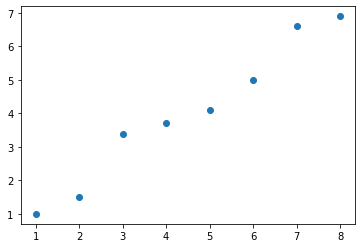

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Simple data set of good correlation, to start with simple understanding
x = [1,2,3,4,5,6,7,8]
y = [1, 1.5, 3.4, 3.7,4.1,5.0,6.6,6.9]

#Moderately complex data set of Tottenham Hotspur's xG versus Goals per game correlation

#Complex data set of a stock over the last year in daily increment

#Super complex 1,000 - 5,000 data points dataset of marketing or something


plt.scatter(x,y)

<h2>2.1 Linear Regression Code</h2>

In [2]:
#Overall complexity is O(n) since it consists of doing constant operations for each element, n

def cost_function(y, y_vals):
    
    dis_sum = 0
    i = 0
    
    
    for element in y:                                #O(n)
        dis_sum = dis_sum + ((y_vals[i]-y[i])**2)    #O(1)+O(1)+O(1)+O(1) = All constant operations
        i = i + 1                                    #O(1)
        
    return (dis_sum / len(y))**1/2                   #O(1)

6.585918941533963
4.305470847070263
2.8224065059769403
1.8579023101890129
1.2306336177717188
0.8226809778766558
0.5573584549662265
0.38479505323537055
0.2725580881707621
0.19955540745470562


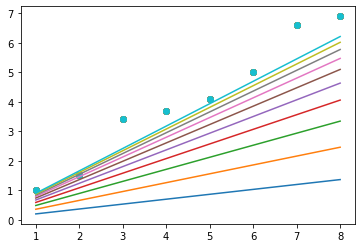

In [3]:
def gradient_descent(m, b, x, y):
    
    learning_rate = 0.001
    i = 0
    for element in x:                       #O(n)
        guess = m*x[i] + b                  #O(1) operations 
        error = y[i] - guess                #O(1) operations
    
        m = m + error*x[i]*learning_rate    #O(1) operations
        b = b + error*learning_rate         #O(1) operations
        
        #print(m, b)
        
        i = i + 1
    
    return m, b
    
m, b = gradient_descent(0, 0, x, y)

#Calculating the values via the slope, intercept.. not really part of the *algorithm*
y2_vals = []
i = 0
for element in x:
    y2_vals.append((x[i]*m) + b)
    i = i + 1

plt.scatter(x,y)
plt.plot(x, y2_vals)

init_cost = 100
new_cost = cost_function(y, y2_vals)
print(new_cost)

while init_cost - new_cost > 0.1:
    init_cost = new_cost
    m, b = gradient_descent(m, b, x, y)
    
    y2_vals = []
    i = 0
    for element in x:
        y2_vals.append((x[i]*m) + b)
        i = i + 1
        
    #plt.figure()
    plt.scatter(x,y)
    plt.plot(x, y2_vals)
    new_cost = cost_function(y, y2_vals)
    print(new_cost)

<h2>LASSO Regression Code</h2>

In [4]:
#Overall complexity is O(n) since it consists of doing constant operations for each element, n

def lasso_cost(y, y_vals, l1):
    
    dis_sum = 0
    i = 0
    
    for element in y:                               #O(n)
        dis_sum = dis_sum + ((y_vals[i]-y[i])**2)   #Many O(1) operations
        i = i + 1                                   
        
    return (dis_sum / len(y))**1/2 + l1*np.abs(dis_sum) #O(1) operations

6.585918941533963
4.994346182601506
3.273991546933251
2.155166679819255
1.4275349966151938
0.9543099343369208
0.6465358077608228
0.44636226175302984
0.31616738227808405
0.23148427264745852


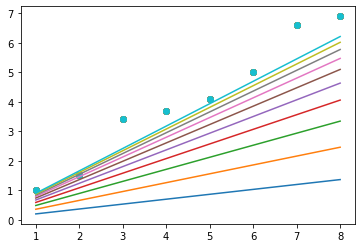

In [5]:
def lasso_gradient_descent(m, b, x, y):
    
    learning_rate = 0.001
    i = 0
    for element in x:
        guess = m*x[i] + b
        error = y[i] - guess
    
        m = m + error*x[i]*learning_rate
        b = b + error*learning_rate
        
        #print(m, b)
        
        i = i + 1
    
    return m, b
    
m, b = lasso_gradient_descent(0, 0, x, y)

y2_vals = []
i = 0
for element in x:
    y2_vals.append((x[i]*m) + b)
    i = i + 1

plt.scatter(x,y)
plt.plot(x, y2_vals)

init_cost = 100
new_cost = cost_function(y, y2_vals)
print(new_cost)

while init_cost - new_cost > 0.1:
    init_cost = new_cost
    m, b = gradient_descent(m, b, x, y)
    
    y2_vals = []
    i = 0
    for element in x:
        y2_vals.append((x[i]*m) + b)
        i = i + 1
        
    #plt.figure()
    plt.scatter(x,y)
    plt.plot(x, y2_vals)
    new_cost = lasso_cost(y, y2_vals, .01)
    print(new_cost)

***

<h1>Evaluation Plan</h1><br>
The plan after this mid-report in terms of evaluation will be to graph and compare the final results of the regression, and using a subjective test of what looks good, better, and best since the future data will be much more tedious and complex than the canonical data used to ensure the algorithm was working. <br>
<br>
In terms of empirical data for evaluating the algorithms, I plan on evaluating the amount of iterations it takes to get to an *acceptable* level of cost and good representation of the data. I also plan on graphing the complexities over iterations and input to compare which is truly more efficient and what is worth it or not. Of course, the cost function is the most important factor in terms of data we can evaluate here, so examining the convergence rate of that versus the other algorithm. I will consider the use of a clock to analyze the actual runtimes of the algorithms since they will be run in the same environment as well across all n. I do not foresee there being a shortage of data to analyze with respect to these algorithms, and will add on to this accordingly if what has been mentioned is not enough. 